In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prophet as pt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set_style('whitegrid')
plt.style.use("default")
%matplotlib inline
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
yf.pdr_override()
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from sklearn import preprocessing
from sklearn import metrics 
import tensorflow as tf
import joblib


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams
from vnstock import *

d:\Projects\Tradeformers\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Chosing dataset from company (yf or vnstock)

df = pd.DataFrame(listing_companies())\
search_word = 'mobile'\
result = df[df['organName'].str.contains(search_word)]\
print(result)

Vin = VIC\
Viettel = VGI\
FPT = FPT\
thế giới di động = MWG\
Petrolimex = PLC

In [99]:
df = pd.DataFrame(listing_companies())
search_word = 'FAHASA'
result = df[df['organName'].str.contains(search_word)]
print(result)



    ticker comGroupCode                                          organName  \
816    FHS        UPCOM  Công ty Cổ phần Phát hành sách Thành phố Hồ Ch...   

                     organShortName organTypeCode comTypeCode  \
816  Phát hành sách TP HCM - FAHASA            DN          CT   

                             icbName  \
816  Sách, ấn bản & sản phẩm văn hóa   

                                           icbNamePath             sector  \
816  Dịch vụ Tiêu dùng/Truyền thông/Truyền thông/Sá...  Dịch vụ Tiêu dùng   

         industry  ... VNCOND VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
816  Truyền thông  ...  False  False  False  False   False  False  False   

     VNMAT  VNREAL  VNUTI  
816  False   False  False  

[1 rows x 35 columns]


In [186]:
company_overview('FPT')
df = stock_historical_data("FPT", "2018-01-01", '2023-10-8', "1D")
df = pd.DataFrame(df)
close = df["close"].tolist()

In [2]:
companyName = 'AMZN'
start_date = '2020-04-05'
end_date = '2023-04-05'
df = yf.download(companyName, start_date, end_date)
#close = df["Close"].tolist()

[*********************100%%**********************]  1 of 1 completed


# Dataset exploration

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000
2020-04-08,101.050003,102.199997,100.557503,102.150002,102.150002,79546000
2020-04-09,102.214996,102.650002,100.883003,102.138000,102.138000,92930000
2020-04-13,102.000000,109.000000,101.900002,108.443497,108.443497,134334000


In [38]:
#foreign companies
start_date = dt.datetime(2016, 10, 1)
end_date = dt.datetime(2021, 9, 30)
df = pdr.get_data_yahoo('GOOG', start_date, end_date)
#df = yf.download('GOOG', start=start_date, end=end_date)
display(df.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,38.712502,38.803249,38.474998,38.627998,38.627998,25576000
2016-10-04,38.801498,38.935501,38.644501,38.821499,38.821499,24028000
2016-10-05,38.965500,39.103500,38.782501,38.823502,38.823502,29224000
2016-10-06,38.950001,39.023998,38.777000,38.842999,38.842999,21414000
2016-10-07,38.983002,38.983002,38.537498,38.754002,38.754002,18664000


In [4]:
df = df.rename(columns={'Open': 'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

In [24]:
df['close'].describe()

count    755.000000
mean     142.523591
std       27.805290
min       81.820000
25%      118.388252
50%      154.474503
75%      164.654999
max      186.570496
Name: close, dtype: float64

In [6]:
df = pd.DataFrame(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-04-06 to 2023-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       755 non-null    float64
 1   high       755 non-null    float64
 2   low        755 non-null    float64
 3   close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,Date,open,high,low,close,Adj Close,volume
0,2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
1,2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000
2,2020-04-08,101.050003,102.199997,100.557503,102.150002,102.150002,79546000
3,2020-04-09,102.214996,102.650002,100.883003,102.138000,102.138000,92930000
4,2020-04-13,102.000000,109.000000,101.900002,108.443497,108.443497,134334000


In [10]:
df.rename(columns={'Date':'date'},inplace=True)

In [11]:
df1 = df

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       755 non-null    datetime64[ns]
 1   open       755 non-null    float64       
 2   high       755 non-null    float64       
 3   low        755 non-null    float64       
 4   close      755 non-null    float64       
 5   Adj Close  755 non-null    float64       
 6   volume     755 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.4 KB


Check distribution of each features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\492318079.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column])#, color='#75f8f2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18640\492318079.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column])#, color='#75f8f

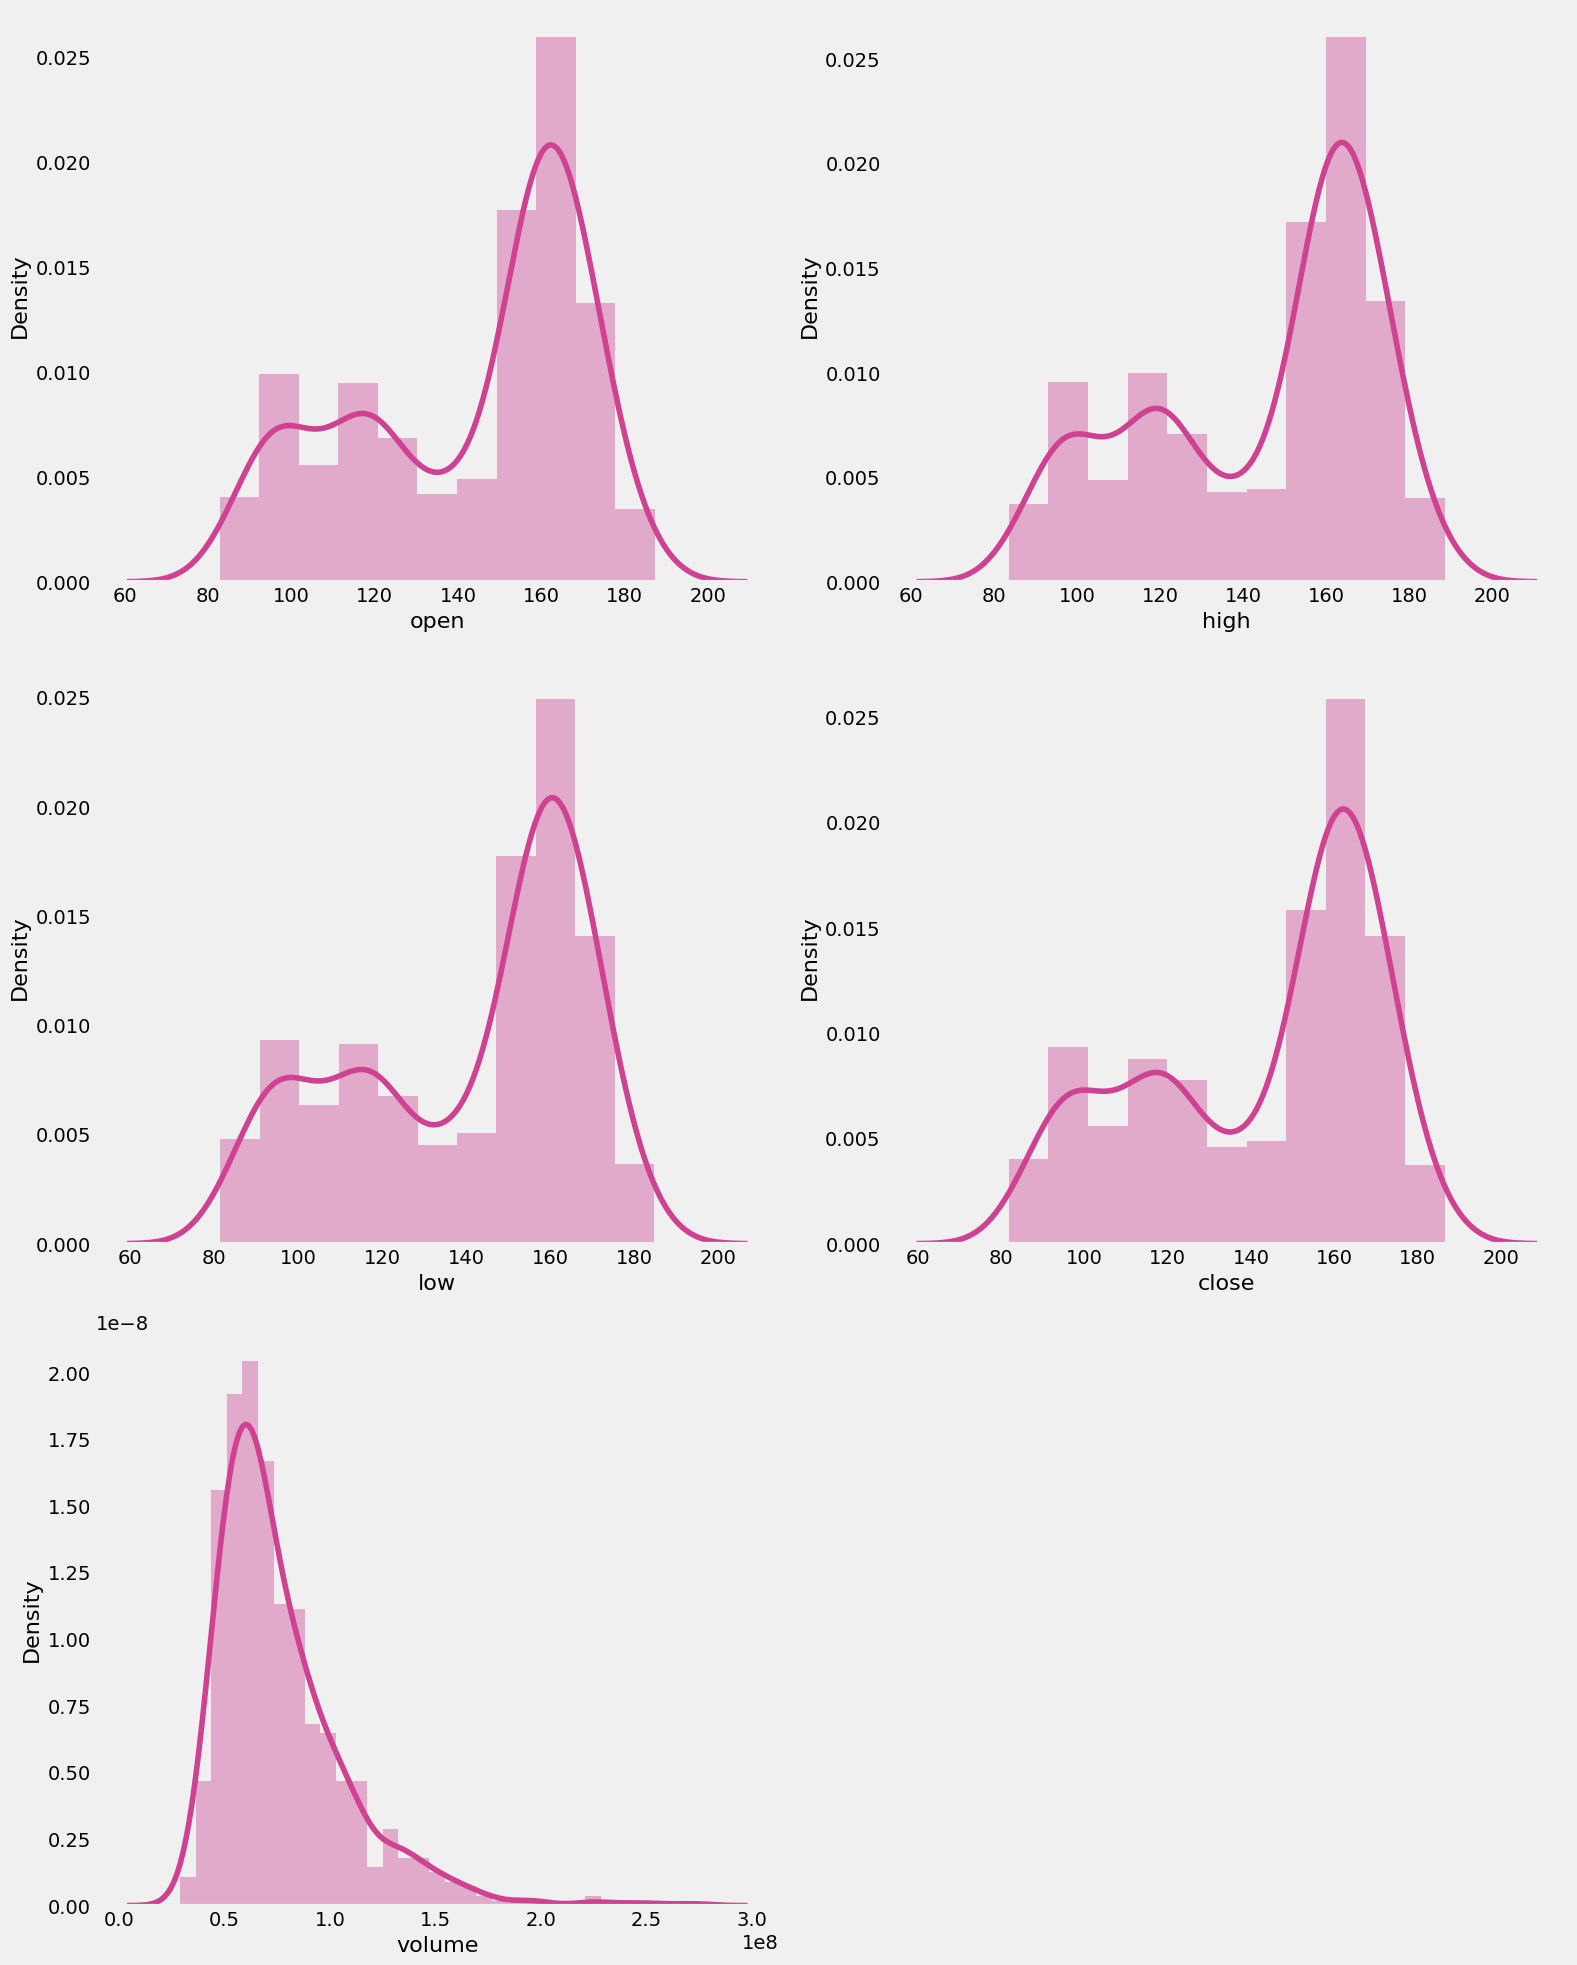

In [25]:
features = ['open', 'high', 'low', 'close', 'volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(4, 2, idx + 1)
    sns.distplot(df, x=df[column])#, color='#75f8f2')
    #plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()

checking The Behavior Of Features In Relation To 'close'

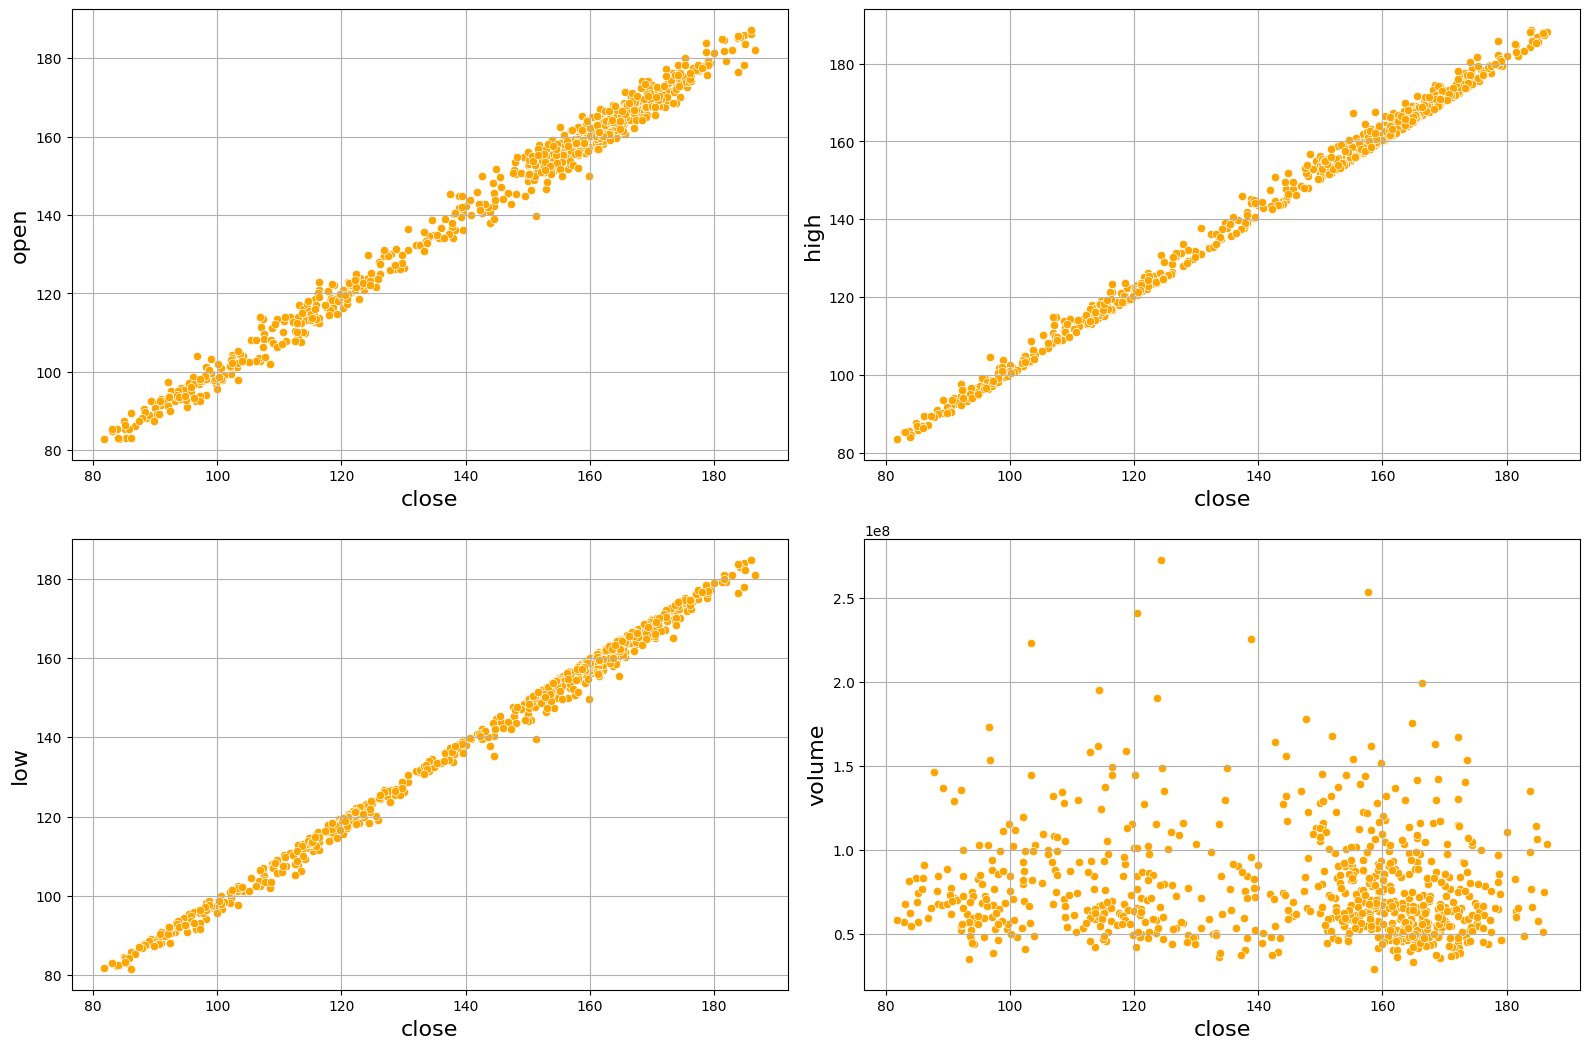

In [14]:
features = ['open', 'high', 'low', 'volume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['close'], y=df[column] , data = df, color='orange')
    #plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

Boxplot distribution

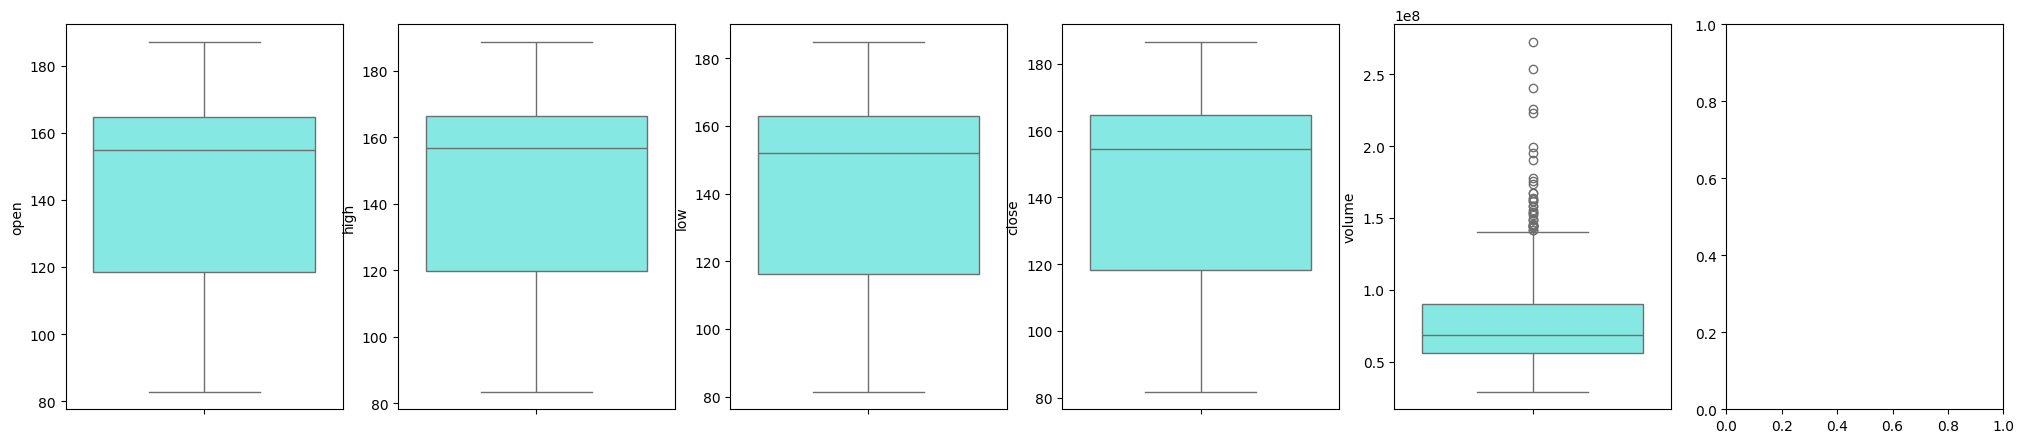

In [15]:
features = ['open', 'high', 'low', 'close', 'volume']
fig  = plt.subplots(nrows = 1, ncols = 6,figsize = (25,5))
for i in range(len(features)) :
    plt.subplot(1, 6,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()


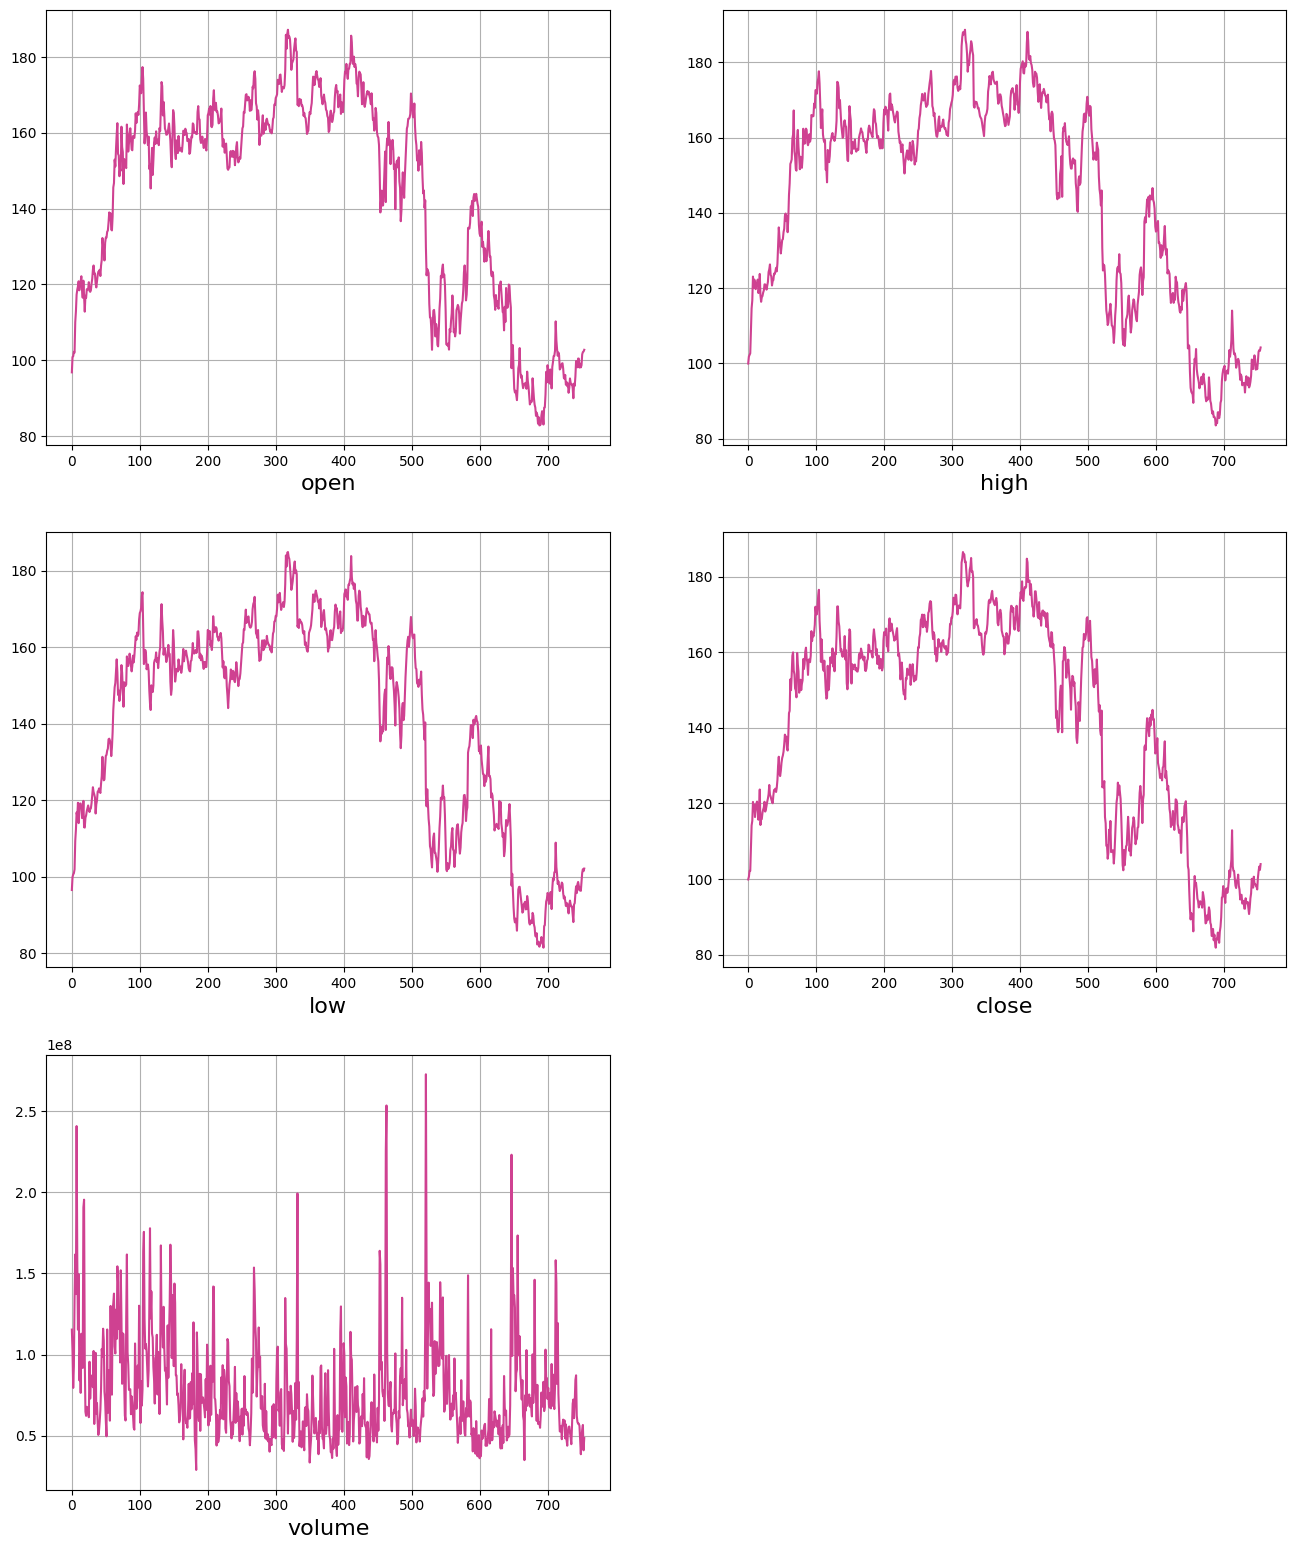

In [16]:
features = ['open', 'high', 'low', 'close', 'volume']
plt.figure(figsize=(16,26))
for idx, column in enumerate(features): 
    plt.subplot(4, 2, idx + 1)
    plt.plot(df[column])
    #plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.grid()



Moving average:

A moving average (MA), a popular technical indicator, smoothes price movements by removing the noise from erratic short-term price swings. There are numerous ways to build moving averages, and the number of days used for the averaging interval might vary. The average is calculated over a predetermined time frame, such as weeks, days, hours, minutes.

In [17]:
# New Style
plt.style.use("fivethirtyeight")

In [18]:
df1= df.copy()

In [19]:
df1.head()

,date,open,high,low,close,Adj Close,volume
0,2020-04-06,96.800003,99.926003,96.500999,99.879501,99.879501,115464000
1,2020-04-07,100.855499,101.786003,99.880997,100.580002,100.580002,102280000
2,2020-04-08,101.050003,102.199997,100.557503,102.150002,102.150002,79546000
3,2020-04-09,102.214996,102.650002,100.883003,102.138000,102.138000,92930000
4,2020-04-13,102.000000,109.000000,101.900002,108.443497,108.443497,134334000


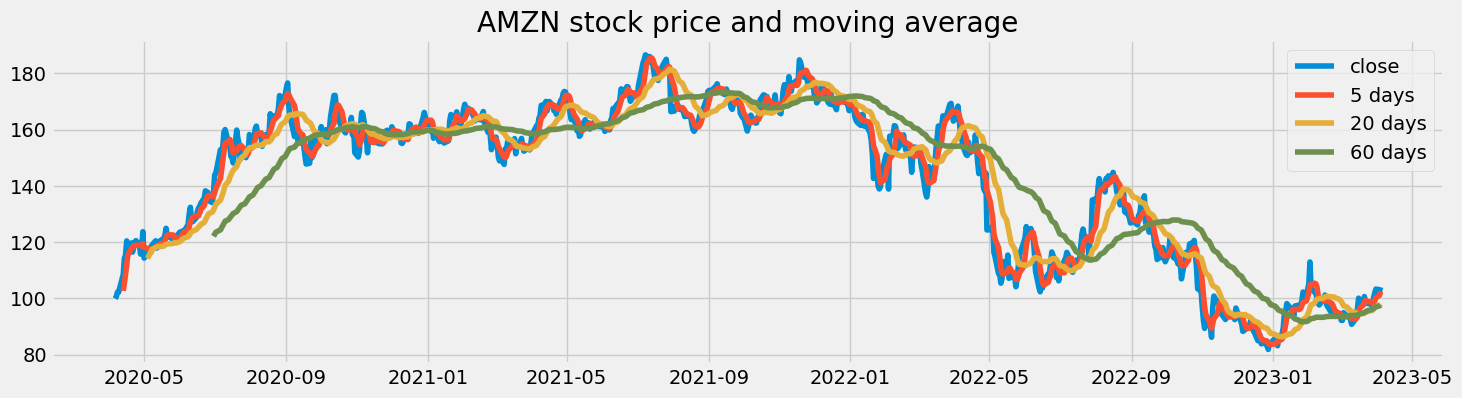

In [23]:
# Checking and choosing the best time step
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['close'].rolling(MA).mean()   

plt.figure(figsize=(16,4))

plt.plot(df1['date'],df1['close'],label='close')
plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
#plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
#plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.title(f'{companyName} stock price and moving average')
plt.legend()
plt.show()

# Prepering dataset(Train, Test) to using in RNN Models

In [26]:
# Copy from df1
df2= df1.copy()

In [27]:
# Normalaze Data For Create Trin and Test with new dataframe with only the 'Close' column 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close'])) 
# now have a scaled dataframe with 'colose column'
df3=pd.DataFrame(scaled, columns=['close'])

In [28]:
print(df3.head())
print(df3.describe())

      close
0  0.172405
1  0.179092
2  0.194080
3  0.193966
4  0.254161
            close
count  755.000000
mean     0.579506
std      0.265443
min      0.000000
25%      0.349099
50%      0.693596
75%      0.790784
max      1.000000


Examining the divisions of Test and Train

In [29]:
# Finding a Length of %90 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .9 )) 
print('Length of %90 of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.close) - new_dataset_length)

Length of %90 of Dataset is  680  Therefore, the test data length is  75


Creating Train and Test from the column of 'close'

In [30]:
# Create the training data set with 20 time steps 
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.17240493, 0.17909225, 0.19408024, 0.19396568, 0.25416106,
       0.30879091, 0.32041856, 0.36839444, 0.35255203, 0.36143501,
       0.33017503, 0.34705802, 0.36422266, 0.36936342, 0.35302939,
       0.32347343, 0.35145894, 0.39980715, 0.31008925, 0.3243851 ])]
[0.3252490539413484]

[array([0.17240493, 0.17909225, 0.19408024, 0.19396568, 0.25416106,
       0.30879091, 0.32041856, 0.36839444, 0.35255203, 0.36143501,
       0.33017503, 0.34705802, 0.36422266, 0.36936342, 0.35302939,
       0.32347343, 0.35145894, 0.39980715, 0.31008925, 0.3243851 ]), array([0.17909225, 0.19408024, 0.19396568, 0.25416106, 0.30879091,
       0.32041856, 0.36839444, 0.35255203, 0.36143501, 0.33017503,
       0.34705802, 0.36422266, 0.36936342, 0.35302939, 0.32347343,
       0.35145894, 0.39980715, 0.31008925, 0.3243851 , 0.32524905])]
[0.3252490539413484, 0.34122037833314645]



In [31]:
# Converting the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshape the X_train 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [84]:
print('X_train: ', X_train[0])
print('Y_train: ', y_train[0])

X_train:  [[0.17240493]
 [0.17909225]
 [0.19408024]
 [0.19396568]
 [0.25416106]
 [0.30879091]
 [0.32041856]
 [0.36839444]
 [0.35255203]
 [0.36143501]
 [0.33017503]
 [0.34705802]
 [0.36422266]
 [0.36936342]
 [0.35302939]
 [0.32347343]
 [0.35145894]
 [0.39980715]
 [0.31008925]
 [0.3243851 ]]
Y_train:  0.3252490539413484


# LSTM

In [90]:
# Creat RNN
RNN1 = tf.keras.models.Sequential()
# The First LSTM Layer
RNN1.add(tf.keras.layers.LSTM(units=200, input_shape=(X_train.shape[1],1)))
# The Connection
RNN1.add(tf.keras.layers.Dense(units=30, activation='relu'))
# The Output layer
RNN1.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_1 = RNN1.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=25)

Epoch 1/25
21/21 [==============================] - 19s 174ms/step - loss: 0.0641 - accuracy: 0.0015 - val_loss: 9040.1182 - val_accuracy: 0.0000e+00
Epoch 2/25
21/21 [==============================] - 1s 40ms/step - loss: 0.0053 - accuracy: 0.0015 - val_loss: 9047.2695 - val_accuracy: 0.0000e+00
Epoch 3/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0036 - accuracy: 0.0015 - val_loss: 9052.3408 - val_accuracy: 0.0000e+00
Epoch 4/25
21/21 [==============================] - 1s 28ms/step - loss: 0.0033 - accuracy: 0.0015 - val_loss: 9054.3506 - val_accuracy: 0.0000e+00
Epoch 5/25
21/21 [==============================] - 1s 27ms/step - loss: 0.0032 - accuracy: 0.0015 - val_loss: 9056.2070 - val_accuracy: 0.0000e+00
Epoch 6/25
21/21 [==============================] - 1s 31ms/step - loss: 0.0029 - accuracy: 0.0015 - val_loss: 9057.8193 - val_accuracy: 0.0000e+00
Epoch 7/25
21/21 [==============================] - 0s 22ms/step - loss: 0.0028 - accuracy: 0.0015 - val_loss:

In [91]:
RNN1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               161600    
                                                                 
 dense_4 (Dense)             (None, 30)                6030      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 167661 (654.93 KB)
Trainable params: 167661 (654.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
# Geting The Model Predicted Price Values 
predictions1 = RNN1.predict(X_test)
# Converting scaled number to actual number
predictions1 = scaler.inverse_transform(predictions1)

3/3 [==============================] - 2s 6ms/step


In [93]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions1)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions1)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions1))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions1)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions1)}')

Mean Absolute Error: 2.307432861328125
Mean Squared Error: 8.237373636742126
Root Mean Squared Error: 2.8700825139257105
R2_Score: 0.7958431452026986
Mean Absolute Percentage Error: 0.02417926086501654


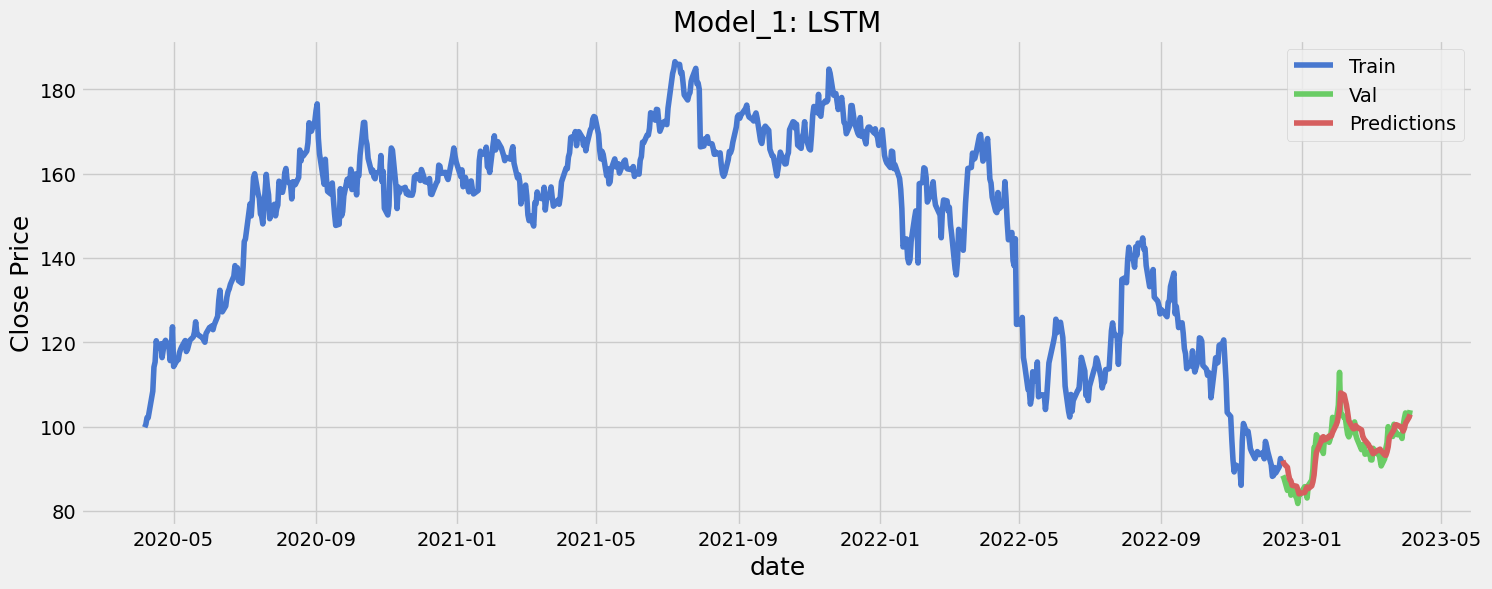

In [94]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1: LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions1']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

Same plot but close up on predictions

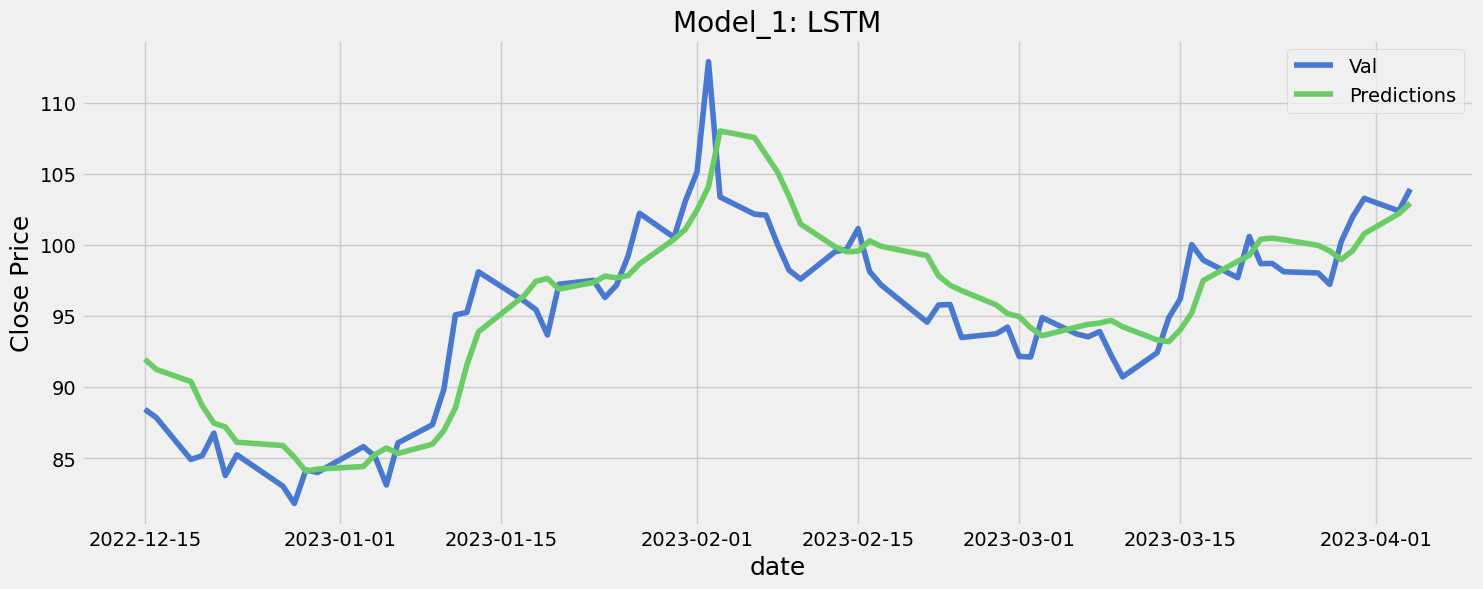

In [104]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions1'] = predictions1

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_1: LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
#plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions1']])
plt.legend([ 'Val', 'Predictions'], loc='best')
plt.show()

# GRU

In [97]:
# Creat RNN
RNN2 = tf.keras.models.Sequential()
# The First GRU Layer
RNN2.add(tf.keras.layers.GRU(units=200, input_shape=(X_train.shape[1],1), activation='tanh'))
# The Connection
RNN2.add(tf.keras.layers.Dense(units=50, activation='tanh'))
# The Output layer
RNN2.add(tf.keras.layers.Dense(units=1))
# Compiling The RNN
RNN2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# Fitting Model on The Train and Validation Dataset
Model_2 = RNN2.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=32, epochs=25)

Epoch 1/25
21/21 [==============================] - 9s 49ms/step - loss: 0.0675 - accuracy: 0.0015 - val_loss: 9046.4971 - val_accuracy: 0.0000e+00
Epoch 2/25
21/21 [==============================] - 0s 23ms/step - loss: 0.0050 - accuracy: 0.0015 - val_loss: 9047.9697 - val_accuracy: 0.0000e+00
Epoch 3/25
21/21 [==============================] - 0s 21ms/step - loss: 0.0024 - accuracy: 0.0015 - val_loss: 9051.8086 - val_accuracy: 0.0000e+00
Epoch 4/25
21/21 [==============================] - 0s 21ms/step - loss: 0.0017 - accuracy: 0.0015 - val_loss: 9055.5537 - val_accuracy: 0.0000e+00
Epoch 5/25
21/21 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 0.0015 - val_loss: 9056.9053 - val_accuracy: 0.0000e+00
Epoch 6/25
21/21 [==============================] - 0s 21ms/step - loss: 0.0015 - accuracy: 0.0015 - val_loss: 9057.2588 - val_accuracy: 0.0000e+00
Epoch 7/25
21/21 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 0.0015 - val_loss: 9

In [98]:
RNN2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 200)               121800    
                                                                 
 dense_8 (Dense)             (None, 50)                10050     
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 131901 (515.24 KB)
Trainable params: 131901 (515.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Geting The Model Predicted Price Values 
predictionsGRU = RNN2.predict(X_test)
# Converting scaled number to actual number
predictionsGRU = scaler.inverse_transform(predictionsGRU)

3/3 [==============================] - 1s 7ms/step


In [100]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictionsGRU)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictionsGRU)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictionsGRU))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictionsGRU)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictionsGRU)}')

Mean Absolute Error: 1.9434452311197916
Mean Squared Error: 6.011991075148498
Root Mean Squared Error: 2.451936189044996
R2_Score: 0.8509975092671412
Mean Absolute Percentage Error: 0.02028295055089574


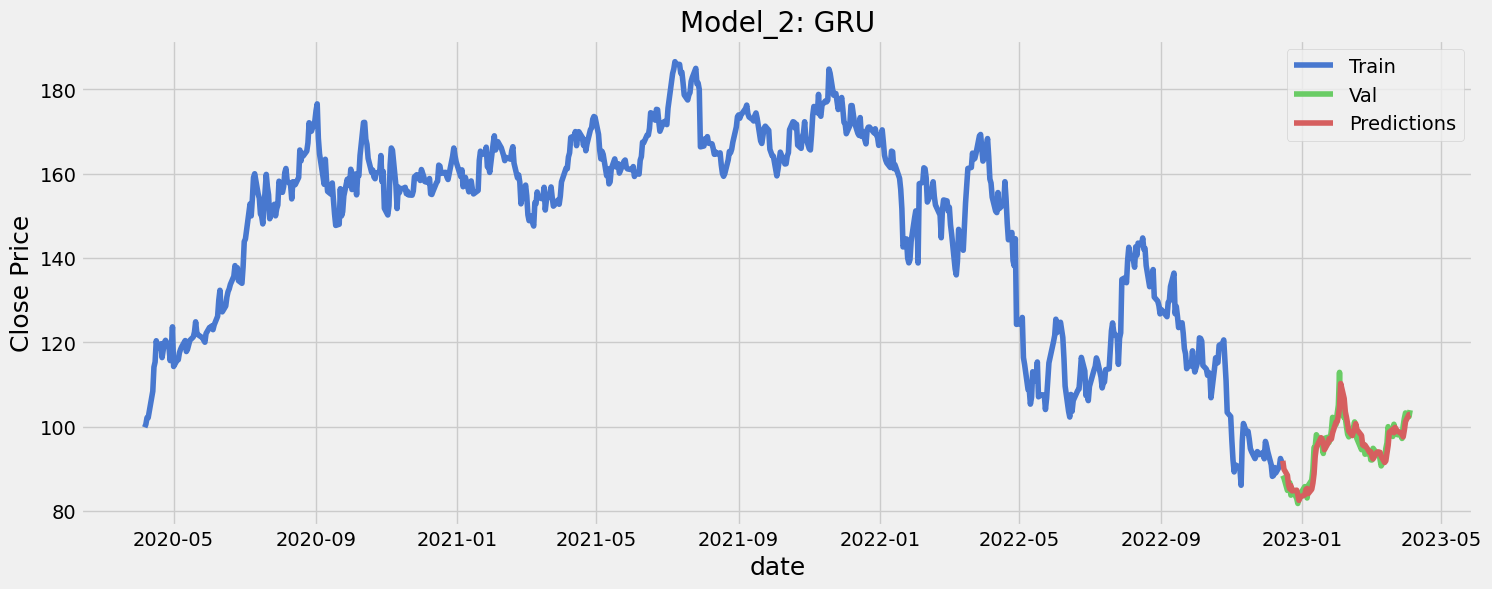

In [101]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['PredictionsGru'] = predictionsGRU

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2: GRU')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'PredictionsGru']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

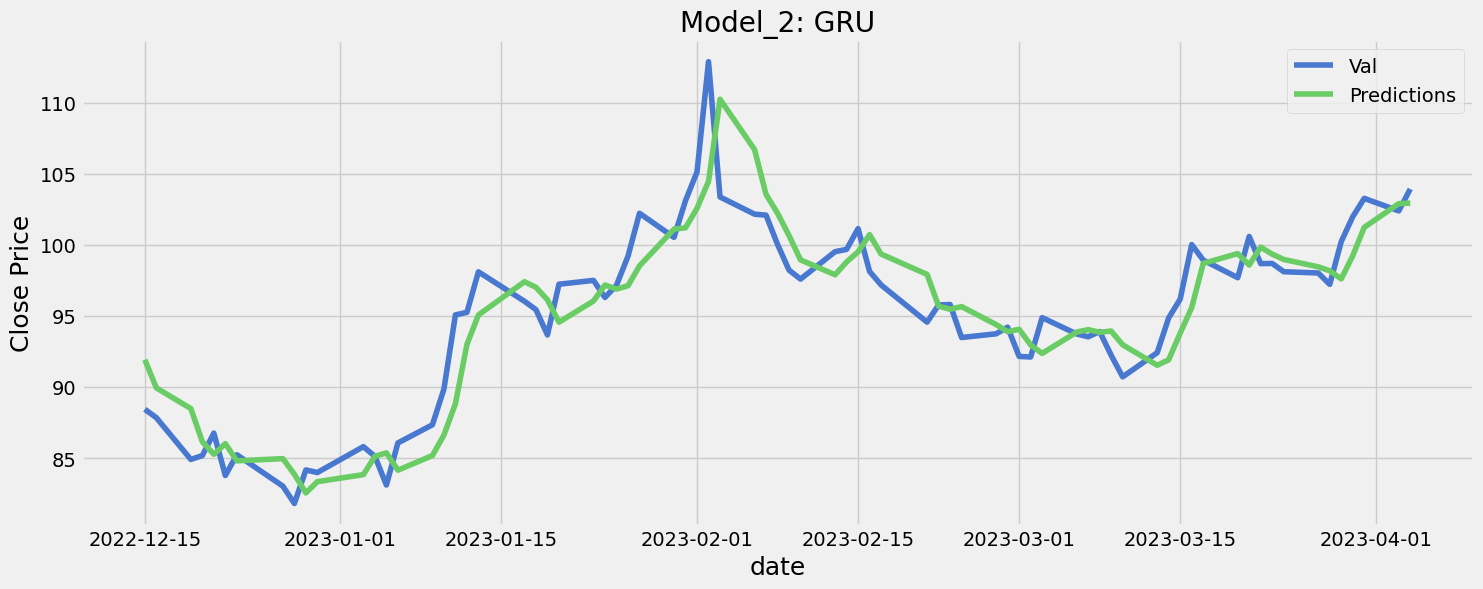

In [103]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['PredictionsGru'] = predictionsGRU

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2: GRU')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
#plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'PredictionsGru']])
plt.legend(['Val', 'Predictions'], loc='best')
plt.show()

# Random forest (doesn't work well)

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
randFor_X_train = X_train.reshape((X_train.shape[0], -1))

In [95]:
RandFor = RandomForestRegressor(n_estimators=1000)
RandFor.fit(randFor_X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [96]:
randFor_X_test = X_test.reshape((X_test.shape[0], -1))

In [97]:
# Geting The Model Predicted Price Values 
predictions2 = RandFor.predict(randFor_X_test)
# Rescale data to single feature
predictions2 = predictions2.reshape(-1,1)
# Converting scaled number to actual number
predictions2 = scaler.inverse_transform(predictions2)

In [98]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions2)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions2)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions2))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions2)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions2)}')

Mean Absolute Error: 25.14992612524433
Mean Squared Error: 745.225468556133
Root Mean Squared Error: 27.298818079838785
R2_Score: -5.642050728484379
Mean Absolute Percentage Error: 0.1898368900923654


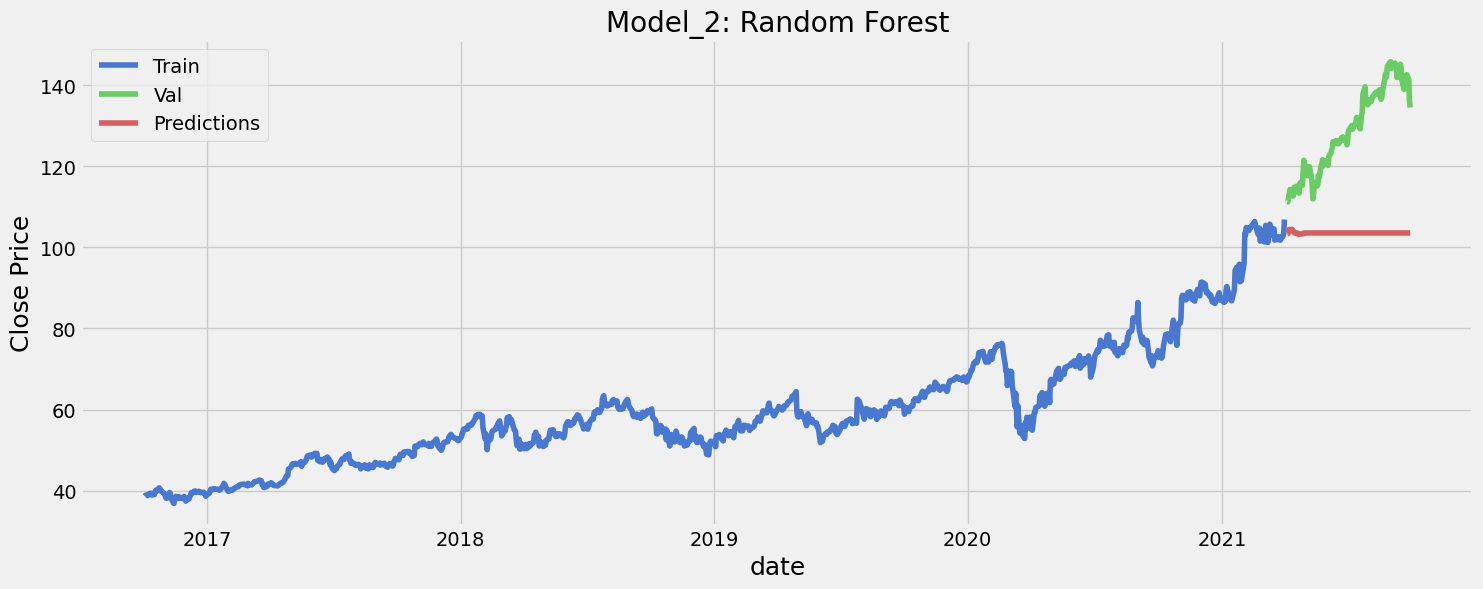

In [99]:
plt.style.use("seaborn-v0_8-muted")
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions2'] = predictions2

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_2: Random Forest')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions2']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()

# Arima (still not clear about auto_arima/doesn't work well)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3930.868, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3932.833, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3932.834, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3928.870, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3933.115, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.401 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  755
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1963.435
Date:                Fri, 26 Jan 2024   AIC                           3928.870
Time:                        08:07:30   BIC                           3933.495
Sample:                             0   HQIC                          3930.652
                                - 755                                       

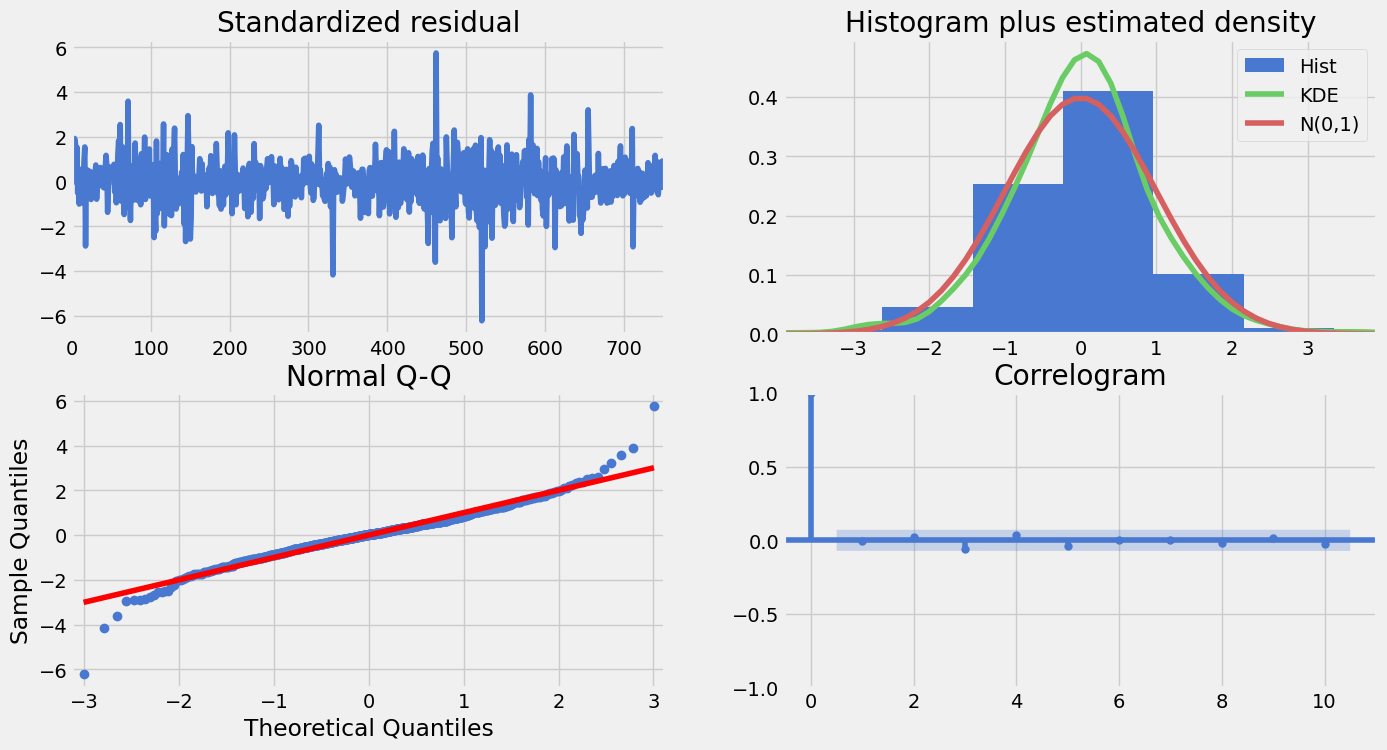

In [47]:
model_autoARIMA = auto_arima(df2['close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [77]:
model_ARIMA = sm.tsa.arima.ARIMA(df2['close'], order = (0,1,0))
Model_3 = model_ARIMA.fit()

AttributeError: module 'statsmodels.tsa.arima.api' has no attribute 'SARIMAX'

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_3 = SARIMAX(df2['close'], order =(0,1,0))
model_3 = model_3.fit()

To evaluate the performance of the model, you can use the walk-forward validation method. This method involves using the model to make a prediction for each step in the test set, then adding the actual observation from the test set to the history for the next prediction. The performance of the model can be evaluated by calculating the mean absolute error between the predicted and actual values

In [57]:
# Get the predictions
predictions3 = Model_3.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
#predictions3 = predictions3.to_numpy().reshape(len(y_test),1)

In [81]:
#test
# Get the predictions
predictions3 = model_3.predict(start=len(X_train), end=len(X_train)+len(X_test)-1, dynamic=False)
predictions3 = predictions3.to_numpy().reshape(len(y_test),1)

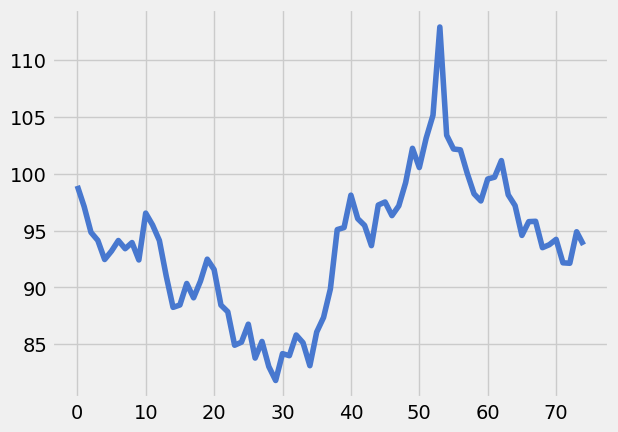

In [82]:
plt.plot(predictions3)

In [58]:
predictions3 = predictions3.to_numpy().reshape(len(y_test),1)

In [70]:
predictions3

0        0.000000
1       99.879501
2      100.580002
3      102.150002
4      102.138000
          ...    
730     94.230003
731     92.169998
732     92.129997
733     94.900002
734     93.750000
Name: predicted_mean, Length: 735, dtype: float64

In [60]:
# geting the score and error
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, predictions3)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, predictions3)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, predictions3))}')
print(f'R2_Score: {metrics.r2_score(y_test, predictions3)}')
print(f'Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, predictions3)}')

Mean Absolute Error: 8.254933268229166
Mean Squared Error: 99.43574010531574
Root Mean Squared Error: 9.97174709393072
R2_Score: -1.4644369491502114
Mean Absolute Percentage Error: 0.08640554658042907


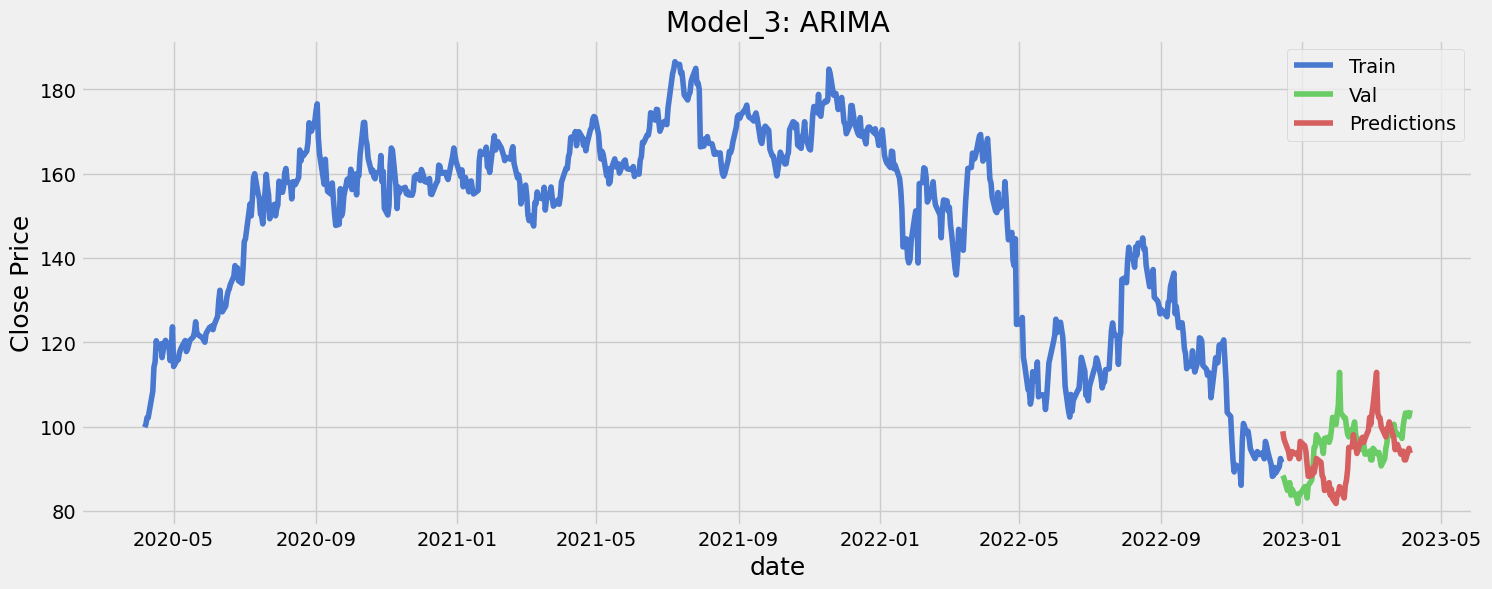

In [61]:
# Create train and val data from DataFrame
train = df2.filter(['close'])[:new_dataset_length]
valid = df2.filter(['close'])[new_dataset_length:]
valid['Predictions3'] = predictions3

# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model_3: ARIMA')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df1['date'].iloc[:new_dataset_length],train['close'])
plt.plot(df1['date'].iloc[new_dataset_length:],valid[['close', 'Predictions3']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')
plt.show()